In [ ]:
pip install google-cloud

In [ ]:
pip install Pillow

In [ ]:
pip install pdf2image

In [ ]:
pip install poppler-utils

In [ ]:
import io
import os
from google.cloud import vision
from pdf2image import convert_from_path
from PIL import Image

In [30]:
#Authenticate google service acount
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'savvy-hybrid-389017-984cabbf64b0.json'
client = vision.ImageAnnotatorClient()

In [31]:
#Converting pdf to image using poppler
pdf_path = 'Hello.pdf'
poppler = "/project/arcc-students/csloan5/environments/GPU_env/bin/"

images = convert_from_path(pdf_path, poppler_path=poppler)


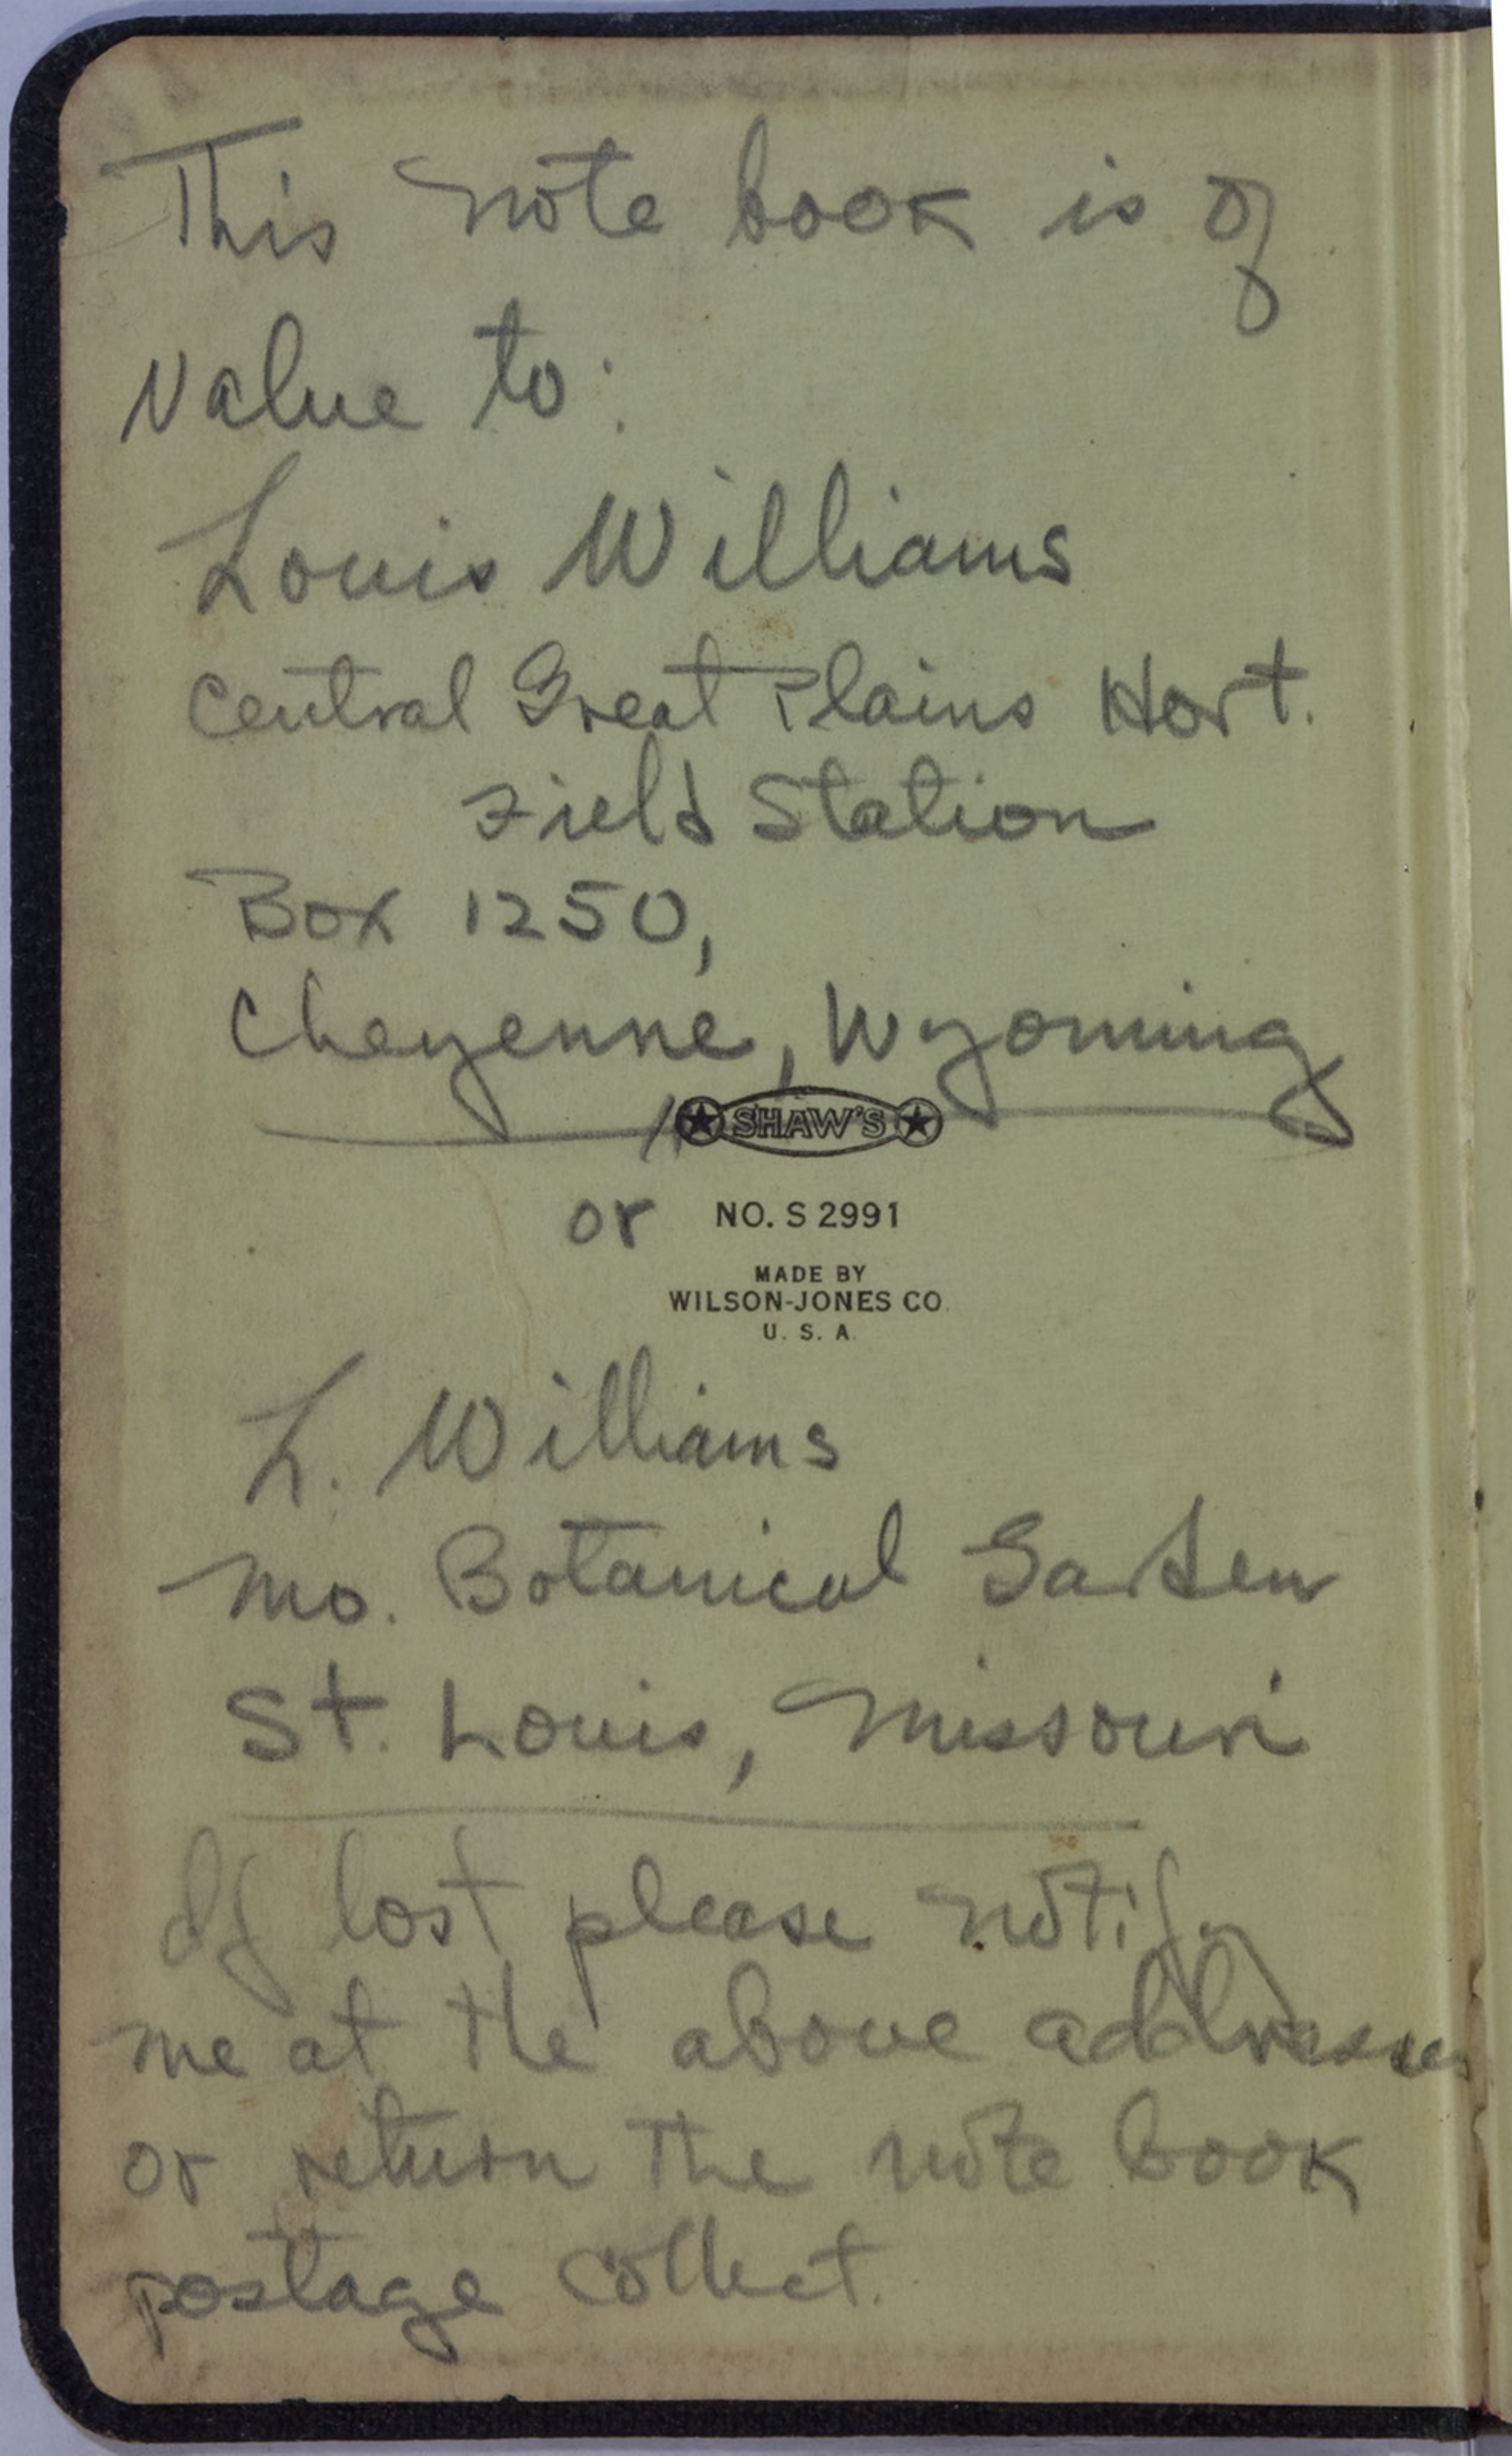

In [32]:
image.show()

In [33]:
 # Convert image to bytes (what google cloud vision uses as their input)
buf = io.BytesIO()
image.save(buf, format='JPEG')
byte_im = buf.getvalue()

In [34]:
# Perform OCR
image = vision.Image(content=byte_im)
response = client.document_text_detection(image=image, image_context={"language_hints": ['en']})

In [35]:
#Extract text from client

for r in response.text_annotations:
    print(r.description)

This note book is of
is of
value to:
Louis Williams
Central Great Plains Hort.
Field Station
Box 1250,
Cheyenne, Wyoming
or NO. S 2991
MADE BY
WILSON-JONES CO.
U. S. A.
L. Williams
mo. Botanical Sarten
St. Louis, Missouri
noti
of
If lost please ristif
me at the above addresse
or return the note book
collect..
postage
This
note
book
is
of
is
of
value
to
:
Louis
Williams
Central
Great
Plains
Hort
.
Field
Station
Box
1250
,
Cheyenne
,
Wyoming
or
NO
.
S
2991
MADE
BY
WILSON
-
JONES
CO
.
U.
S.
A.
L.
Williams
mo
.
Botanical
Sarten
St.
Louis
,
Missouri
noti
of
If
lost
please
ristif
me
at
the
above
addresse
or
return
the
note
book
collect
..
postage


In [ ]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision

    client = vision.ImageAnnotatorClient()

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print("Texts:")

    for text in texts:
        print(f'\n"{text.description}"')

        vertices = [
            f"({vertex.x},{vertex.y})" for vertex in text.bounding_poly.vertices
        ]

        print("bounds: {}".format(",".join(vertices)))

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )

In [ ]:
detect_text('ayo.jpg')